# **JALATECH**
# SHRIMP CULTIVICATION ANALYSIS

## 1. Data Preparation

### - Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### - Importing Data

In [2]:
pd.set_option('display.max_columns', None)

df_farms = pd.read_csv('./Data Jalatech/farms.csv')
df_ponds = pd.read_csv('./Data Jalatech/ponds.csv')
df_cycles = pd.read_csv('./Data Jalatech/cycles.csv')
df_harvests = pd.read_csv('./Data Jalatech/harvests.csv')
df_feeds = pd.read_csv('./Data Jalatech/feeds.csv')
df_measurements = pd.read_csv('./Data Jalatech/measurements.csv')
df_fasting = pd.read_csv('./Data Jalatech/fasting.csv')
df_samplings = pd.read_csv('./Data Jalatech/samplings.csv')

In [3]:
# Function for cheking info data
def data_info(x):
    data_type = x.dtypes
    n_unique = x.nunique()
    missing_values = x.isnull().sum()
    percent_missing = (missing_values/len(x))*100
    print(f'Number of Rows, Columns {x.shape}')
    print(f'Number of Duplicated Values {x.duplicated().sum()}')
    display(x.head())
    display(x.describe())
    
    return display(pd.DataFrame({'missing_values' : missing_values,
                            'percent_missing' : percent_missing,
                            'numbers_of_unique' : n_unique,
                            'data_type' : data_type}).sort_values(by= 'missing_values', ascending = False))

In [4]:
dataset = [df_farms, df_ponds, df_cycles, df_harvests, df_feeds, df_measurements, df_fasting, df_samplings]

for df in dataset:
    df_name = [name for name, obj in globals().items() if obj is df][0]
    print(f'========== {df_name} ==========')
    data_info(df)
    print(f'------------------------------------------------------------------------')

========== df_farms ==========
Number of Rows, Columns (160, 4)
Number of Duplicated Values 0


,id,province,regency,timezone
0,3,JAWA TENGAH,PURWOREJO,+07:00
1,869,SULAWESI SELATAN,BARRU,+08:00
2,1000,JAWA TIMUR,SITUBONDO,+07:00
3,1662,JAWA TIMUR,BANYUWANGI,+07:00
4,1739,LAMPUNG,LAMPUNG BARAT,+07:00


,id
count,160.00000
mean,7836.03750
std,2305.85233
min,3.00000
25%,7982.25000
50%,8336.00000
75%,9050.50000
max,10967.00000


,missing_values,percent_missing,numbers_of_unique,data_type
regency,23,14.375,35,object
province,21,13.125,14,object
id,0,0.000,160,int64
timezone,0,0.000,3,object


------------------------------------------------------------------------
========== df_ponds ==========
Number of Rows, Columns (431, 5)
Number of Duplicated Values 0


,id,farm_id,length,width,deep
0,16053,7941,49.27,36.96,2.0
1,30350,8409,20.00,15.70,1.2
2,32206,8368,40.00,15.00,1.0
3,34710,8470,70.71,70.71,1.5
4,32214,9044,36.51,27.39,1.4


,id,farm_id,length,width,deep
count,431.000000,431.000000,431.000000,431.000000,427.000000
mean,28723.199536,8093.341067,46.481508,38.766381,3.472553
std,9504.094249,2123.223424,18.651341,15.080308,17.516078
min,1.000000,3.000000,3.000000,2.000000,0.700000
25%,21964.500000,8297.000000,33.000000,30.000000,1.200000
50%,32246.000000,8470.000000,46.190000,38.120000,1.300000
75%,34729.500000,9225.000000,56.600000,46.915000,1.500000
max,40876.000000,10967.000000,222.500000,70.710000,150.000000


,missing_values,percent_missing,numbers_of_unique,data_type
deep,4,0.928074,20,float64
id,0,0.000000,431,int64
farm_id,0,0.000000,160,int64
length,0,0.000000,154,float64
width,0,0.000000,159,float64


------------------------------------------------------------------------
========== df_cycles ==========
Number of Rows, Columns (506, 6)
Number of Duplicated Values 6


,id,pond_id,total_seed,started_at,finished_at,area
0,18360,33945,400000,2022-12-01 00:00:00.000,2023-02-17 00:00:00.000,699.90
1,14583,31451,155792,2022-05-15 00:00:00.000,2022-07-23 00:00:00.000,1000.00
2,19049,13249,175000,2022-06-30 00:00:00.000,2022-10-12 00:00:00.000,2256.25
3,16334,7369,400200,2022-09-19 00:00:00.000,2023-01-21 00:00:00.000,2820.00
4,18740,31447,169702,2022-05-15 00:00:00.000,2022-07-23 00:00:00.000,1000.00


,id,pond_id,total_seed,area
count,506.000000,506.000000,5.060000e+02,506.000000
mean,17769.964427,28487.288538,2.343486e+05,2117.158953
std,2802.975627,9906.357389,1.472741e+05,2625.168630
min,7615.000000,1.000000,1.272000e+03,7.000000
25%,16057.250000,21965.250000,1.250000e+05,1000.000000
50%,18231.500000,32240.000000,2.240000e+05,1600.000000
75%,19669.750000,34727.000000,3.018678e+05,2500.000000
max,23531.000000,40876.000000,1.377414e+06,40000.000000


,missing_values,percent_missing,numbers_of_unique,data_type
id,0,0.0,500,int64
pond_id,0,0.0,431,int64
total_seed,0,0.0,237,int64
started_at,0,0.0,234,object
finished_at,0,0.0,267,object
area,0,0.0,224,float64


------------------------------------------------------------------------
========== df_harvests ==========
Number of Rows, Columns (1870, 6)
Number of Duplicated Values 0


,cycle_id,size,weight,id,harvested_at,status
0,15308,119.78,481.20,15542.0,2023-01-03,Partial
1,15308,119.78,65.54,15543.0,2023-01-03,Partial
2,15308,63.42,111.66,15919.0,2023-01-21,Partial
3,15308,113.57,180.09,15920.0,2023-01-21,Partial
4,15308,113.57,346.57,15921.0,2023-01-21,Partial


,cycle_id,size,weight,id
count,1870.000000,1870.000000,1870.000000,1870.000000
mean,17932.112299,97.621818,714.875540,14309.020321
std,2759.434177,60.297032,2404.882573,3209.994709
min,7615.000000,10.700000,0.000000,4744.000000
25%,16163.000000,59.590000,27.740000,12344.250000
50%,18360.000000,82.220000,250.000000,14939.500000
75%,19687.750000,120.000000,652.282500,16408.500000
max,23531.000000,1000.000000,90000.000000,19655.000000


,missing_values,percent_missing,numbers_of_unique,data_type
status,49,2.620321,5,object
cycle_id,0,0.000000,500,int64
size,0,0.000000,635,float64
weight,0,0.000000,1479,float64
id,0,0.000000,1868,float64
harvested_at,0,0.000000,404,object


------------------------------------------------------------------------
========== df_feeds ==========
Number of Rows, Columns (143884, 3)
Number of Duplicated Values 5099


,cycle_id,logged_at,quantity
0,15308,2022-11-02 00:00:00.000,2.11
1,15308,2022-11-02 03:30:00.000,2.11
2,15308,2022-11-02 05:30:00.000,2.11
3,15308,2022-11-03 00:00:00.000,2.32
4,15308,2022-11-03 03:30:00.000,2.32


,cycle_id,quantity
count,143884.000000,143879.000000
mean,17935.040818,13.666508
std,2790.700044,21.761498
min,7615.000000,-1.000000
25%,16091.000000,3.500000
50%,18403.000000,7.500000
75%,19688.000000,16.000000
max,23531.000000,423.000000


,missing_values,percent_missing,numbers_of_unique,data_type
logged_at,5,0.003475,24441,object
quantity,5,0.003475,2132,float64
cycle_id,0,0.000000,500,int64


------------------------------------------------------------------------
========== df_measurements ==========
Number of Rows, Columns (37909, 24)
Number of Duplicated Values 0


,pond_id,cycle_id,measured_date,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,evening_salinity,morning_pH,evening_pH,transparency,turbidity,ammonia,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,tom,total_plankton_
0,35456,23531,2022-09-27,27.5,NaN,3.4,NaN,31.0,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37074,15493,2023-03-02,29.2,28.6,NaN,NaN,15.0,15.0,7.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32638,15498,2022-06-07,27.0,29.0,NaN,NaN,31.0,31.0,8.10,8.10,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18212,16294,2022-10-19,25.3,27.1,12.5,17.4,13.0,13.0,7.90,NaN,40.0,NaN,NaN,NaN,1.313,70.0,4643.0,595.0,4048.0,NaN,70.0,175.0,NaN
4,30607,20429,2022-04-04,28.7,31.1,4.9,NaN,NaN,NaN,8.23,8.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,pond_id,cycle_id,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,evening_salinity,morning_pH,evening_pH,transparency,turbidity,ammonia,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,tom,total_plankton_
count,37909.000000,37909.000000,31156.000000,29441.000000,23953.000000,23133.000000,28199.000000,18199.000000,34504.000000,19257.000000,26403.000000,17.000000,1446.000000,624.000000,3483.000000,4305.000000,2.302000e+03,2647.000000,2652.000000,1965.000000,2380.000000,2230.000000,4.093000e+03
mean,28330.146430,17771.099422,28.724367,29.645996,5.352111,5.821614,22.008151,19.731211,8.129730,8.281389,43.313508,29.509804,2.275425,12.479099,31.036124,140.042983,5.380612e+03,490.913348,1626.977140,14.971883,129.401034,90.935785,6.103218e+05
std,9944.347436,2820.070407,154.775226,8.832206,36.864910,5.402095,56.624869,13.351132,39.994466,8.665730,19.330410,19.091926,54.765125,20.507494,1082.991191,300.013476,4.166556e+04,312.935209,1624.395682,119.388203,400.831504,33.522136,8.293778e+05
min,1.000000,7615.000000,0.000000,1.000000,-21.359000,-42.260000,-25.000000,0.000000,0.100000,0.300000,-35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-15.170000,0.000000e+00
25%,21963.000000,16064.000000,27.000000,28.700000,4.300000,4.800000,15.791500,14.616000,7.600000,7.900000,30.000000,20.000000,0.009000,1.000000,0.020000,110.000000,3.450000e+03,300.000000,874.800000,0.000000,99.750000,70.000000,8.750000e+04
50%,32246.000000,18231.000000,28.000000,29.700000,5.000000,5.591000,22.000000,19.140000,7.866000,8.200000,39.000000,35.000000,0.024000,3.000000,0.059000,126.000000,4.950000e+03,400.000000,1142.000000,0.000000,120.000000,91.009000,3.675002e+05
75%,34723.000000,19670.000000,28.800000,30.660000,5.650000,6.496000,28.000000,25.000000,8.100000,8.446000,50.000000,45.000000,0.061000,15.000000,0.400000,150.000000,5.555346e+03,600.000000,1426.500000,12.000000,139.000000,106.000000,8.100000e+05
max,40876.000000,23531.000000,27341.000000,1078.933333,5642.000000,768.000000,9124.000000,1528.000000,7421.000000,862.000000,501.000000,55.000000,2057.000000,100.000000,48031.000000,19589.000000,2.000000e+06,3700.000000,32000.000000,2400.000000,19589.000000,458.000000,1.953000e+07


,missing_values,percent_missing,numbers_of_unique,data_type
turbidity,37892,99.955156,9,float64
nitrate,37285,98.353953,45,float64
ammonia,36463,96.185602,172,float64
carbonate,35944,94.816534,62,float64
tom,35679,94.117492,540,float64
hardness,35607,93.927563,729,float64
bicarbonate,35529,93.721807,192,float64
calcium,35262,93.017489,285,float64
magnesium,35257,93.004300,661,float64
nitrite,34426,90.812208,640,float64


------------------------------------------------------------------------
========== df_fasting ==========
Number of Rows, Columns (6189, 3)
Number of Duplicated Values 67


,logged_date,cycle_id,fasting
0,2022-10-17,15804,1.0
1,2022-11-27,15804,0.0
2,2022-11-28,15804,0.0
3,2022-11-29,15804,0.0
4,2022-12-01,15804,1.0


,cycle_id,fasting
count,6189.000000,6172.000000
mean,17675.134755,0.242547
std,2820.779258,0.428658
min,7616.000000,0.000000
25%,16091.000000,0.000000
50%,17832.000000,0.000000
75%,19318.000000,0.000000
max,23531.000000,1.000000


,missing_values,percent_missing,numbers_of_unique,data_type
fasting,17,0.274681,2,float64
logged_date,0,0.000000,479,object
cycle_id,0,0.000000,339,int64


------------------------------------------------------------------------
========== df_samplings ==========
Number of Rows, Columns (3662, 3)
Number of Duplicated Values 130


,cycle_id,sampled_at,average_weight
0,18395,2022-09-28,1.39
1,18395,2022-10-04,1.80
2,18395,2022-10-09,2.20
3,18395,2022-10-13,2.99
4,18395,2022-10-19,4.20


,cycle_id,average_weight
count,3662.000000,3662.000000
mean,17844.941289,9.823048
std,2767.116423,7.075815
min,7615.000000,0.010000
25%,16136.000000,4.500000
50%,18265.000000,8.250000
75%,19692.000000,13.790000
max,23531.000000,88.000000


,missing_values,percent_missing,numbers_of_unique,data_type
cycle_id,0,0.0,487,int64
sampled_at,0,0.0,555,object
average_weight,0,0.0,1565,float64


------------------------------------------------------------------------


## 2. Data Preprocessing

### - Merging Data

In [5]:
data_cycles = df_cycles.copy().drop_duplicates()
data_harvest = df_harvests.copy().drop_duplicates()
data_sampling = df_samplings.copy().drop_duplicates()

In [6]:
data_farm = df_farms.copy().drop_duplicates()
data_farm = data_farm.rename({'id': 'farm_id'}, axis=1)

data_pond = df_ponds.copy().drop_duplicates()
data_pond = data_pond.rename({'id': 'pond_id'}, axis=1)

data_pond = data_pond.merge(data_farm[['farm_id', 'province', 'regency']], on='farm_id', how='left')

In [7]:
data_cycles = data_cycles.rename({'id':'cycle_id'}, axis=1)

data_merged_sr = data_cycles.merge(data_harvest[['cycle_id', 'size', 'weight']], on='cycle_id')
data_merged_sr = data_merged_sr[['cycle_id', 'pond_id', 'started_at', 'finished_at', 'area', 'total_seed', 'size', 'weight']]
data_merged_sr = data_merged_sr.groupby('cycle_id').agg({'pond_id': 'first',
                                                         'started_at': 'first',
                                                         'finished_at': 'first',
                                                         'area': 'mean',
                                                         'total_seed': 'mean',
                                                         'size': 'mean',
                                                         'weight': 'sum'
                                                         }).reset_index()

In [8]:
data_merged_sr

,cycle_id,pond_id,started_at,finished_at,area,total_seed,size,weight
0,7615,34700,2023-01-13 00:00:00.000,2023-06-06 00:00:00.000,4999.90,200000.0,30.800000,5472.00
1,7616,32233,2022-06-24 00:00:00.000,2022-09-15 00:00:00.000,900.00,100000.0,62.000000,700.00
2,9090,34728,2022-08-01 00:00:00.000,2022-11-24 00:00:00.000,4999.90,300000.0,19.900000,5639.00
3,9091,31459,2022-05-12 00:00:00.000,2022-07-22 00:00:00.000,1000.00,187340.0,214.520000,268.20
4,9094,32273,2022-05-04 00:00:00.000,2022-06-21 00:00:00.000,506.00,40000.0,270.000000,115.00
...,...,...,...,...,...,...,...,...
495,22813,7364,2022-09-10 00:00:00.000,2023-01-13 00:00:00.000,3080.25,374400.0,105.350000,5293.20
496,23359,18213,2022-08-13 00:00:00.000,2022-10-22 00:00:00.000,2005.00,400000.0,111.000000,3517.08
497,23362,34491,2023-03-11 00:00:00.000,2023-05-28 00:00:00.000,1056.00,430056.0,100.866667,245.92
498,23529,36819,2022-11-15 00:00:00.000,2023-02-19 00:00:00.000,803.84,283096.0,148.451613,2736.54


In [9]:
# Menghitung jumlah udang yang dipanen
data_merged_sr = data_merged_sr.assign(
    harvested_shrimp=lambda x: x['size'] * x['weight'],
    sr=lambda x: (x['harvested_shrimp'] / x['total_seed']) * 100
)

data_merged_sr

,cycle_id,pond_id,started_at,finished_at,area,total_seed,size,weight,harvested_shrimp,sr
0,7615,34700,2023-01-13 00:00:00.000,2023-06-06 00:00:00.000,4999.90,200000.0,30.800000,5472.00,168537.600000,84.268800
1,7616,32233,2022-06-24 00:00:00.000,2022-09-15 00:00:00.000,900.00,100000.0,62.000000,700.00,43400.000000,43.400000
2,9090,34728,2022-08-01 00:00:00.000,2022-11-24 00:00:00.000,4999.90,300000.0,19.900000,5639.00,112216.100000,37.405367
3,9091,31459,2022-05-12 00:00:00.000,2022-07-22 00:00:00.000,1000.00,187340.0,214.520000,268.20,57534.264000,30.711148
4,9094,32273,2022-05-04 00:00:00.000,2022-06-21 00:00:00.000,506.00,40000.0,270.000000,115.00,31050.000000,77.625000
...,...,...,...,...,...,...,...,...,...,...
495,22813,7364,2022-09-10 00:00:00.000,2023-01-13 00:00:00.000,3080.25,374400.0,105.350000,5293.20,557638.620000,148.941939
496,23359,18213,2022-08-13 00:00:00.000,2022-10-22 00:00:00.000,2005.00,400000.0,111.000000,3517.08,390395.880000,97.598970
497,23362,34491,2023-03-11 00:00:00.000,2023-05-28 00:00:00.000,1056.00,430056.0,100.866667,245.92,24805.130667,5.767884
498,23529,36819,2022-11-15 00:00:00.000,2023-02-19 00:00:00.000,803.84,283096.0,148.451613,2736.54,406243.776774,143.500359


In [10]:
# Menghitung Average Daily Gain
data_sampling['diff_date'] = 0
data_sampling['diff_weight'] = 0

data_sampling['sampled_at'] = pd.to_datetime(data_sampling['sampled_at'])
data_sampling = data_sampling.sort_values(by=['cycle_id', 'sampled_at'])

# Loop untuk menghitung diff_date dan diff_weight untuk setiap ID
cycle_id = None
prev_date = None
prev_weight = None
for index, row in data_sampling.iterrows():
    if cycle_id is not None and row['cycle_id'] == cycle_id:
        diff_date = (row['sampled_at'] - prev_date).days
        diff_weight = row['average_weight'] - prev_weight
        data_sampling.at[index, 'diff_date'] = diff_date
        data_sampling.at[index, 'diff_weight'] = diff_weight
    cycle_id = row['cycle_id']
    prev_date = row['sampled_at']
    prev_weight = row['average_weight']

data_sampling['adg'] = data_sampling['diff_weight']/data_sampling['diff_date']
data_sampling= data_sampling[~data_sampling.isin([np.inf, -np.inf]).any(axis=1)] 
data_sampling['adg'] = data_sampling['adg'].fillna(0)

avg_adg = data_sampling.groupby('cycle_id')['adg'].mean().reset_index()

In [11]:
avg_adg

,cycle_id,adg
0,7615,0.239361
1,7616,0.232000
2,9090,0.170876
3,9091,0.063714
4,9094,0.000000
...,...,...
482,22813,0.365595
483,23359,0.143566
484,23362,0.234839
485,23529,0.122479


In [12]:
data_merged_sr_adg = data_merged_sr.merge(avg_adg[['cycle_id','adg']], on='cycle_id')
data_merged_sr_adg = data_merged_sr_adg.rename({'adg':'avg_adg',
                                                'sr': 'avg_sr'}, axis=1)

In [13]:
data_merged_sr_adg

,cycle_id,pond_id,started_at,finished_at,area,total_seed,size,weight,harvested_shrimp,avg_sr,avg_adg
0,7615,34700,2023-01-13 00:00:00.000,2023-06-06 00:00:00.000,4999.90,200000.0,30.800000,5472.00,168537.600000,84.268800,0.239361
1,7616,32233,2022-06-24 00:00:00.000,2022-09-15 00:00:00.000,900.00,100000.0,62.000000,700.00,43400.000000,43.400000,0.232000
2,9090,34728,2022-08-01 00:00:00.000,2022-11-24 00:00:00.000,4999.90,300000.0,19.900000,5639.00,112216.100000,37.405367,0.170876
3,9091,31459,2022-05-12 00:00:00.000,2022-07-22 00:00:00.000,1000.00,187340.0,214.520000,268.20,57534.264000,30.711148,0.063714
4,9094,32273,2022-05-04 00:00:00.000,2022-06-21 00:00:00.000,506.00,40000.0,270.000000,115.00,31050.000000,77.625000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
482,22813,7364,2022-09-10 00:00:00.000,2023-01-13 00:00:00.000,3080.25,374400.0,105.350000,5293.20,557638.620000,148.941939,0.365595
483,23359,18213,2022-08-13 00:00:00.000,2022-10-22 00:00:00.000,2005.00,400000.0,111.000000,3517.08,390395.880000,97.598970,0.143566
484,23362,34491,2023-03-11 00:00:00.000,2023-05-28 00:00:00.000,1056.00,430056.0,100.866667,245.92,24805.130667,5.767884,0.234839
485,23529,36819,2022-11-15 00:00:00.000,2023-02-19 00:00:00.000,803.84,283096.0,148.451613,2736.54,406243.776774,143.500359,0.122479


In [14]:
data_feed = df_feeds.copy().drop_duplicates()
data_feed = data_feed.groupby('cycle_id')['quantity'].sum().reset_index()

data_feed

,cycle_id,quantity
0,7615,10520.000
1,7616,1416.500
2,9090,7669.000
3,9091,819.500
4,9094,136.900
...,...,...
495,22813,8318.000
496,23359,3369.005
497,23362,1671.100
498,23529,3992.347


In [15]:
data_merged_sr_adg_fcr = data_merged_sr_adg.merge(data_feed[['cycle_id','quantity']], on='cycle_id')

# Menghitung Feed Consumption Ratio
data_merged_sr_adg_fcr = data_merged_sr_adg_fcr.assign(
    fcr=lambda x: x['quantity'] / x['weight']
)

data_merged_sr_adg_fcr['fcr'] = data_merged_sr_adg_fcr['fcr'].round(2)

data_merged_sr_adg_fcr

,cycle_id,pond_id,started_at,finished_at,area,total_seed,size,weight,harvested_shrimp,avg_sr,avg_adg,quantity,fcr
0,7615,34700,2023-01-13 00:00:00.000,2023-06-06 00:00:00.000,4999.90,200000.0,30.800000,5472.00,168537.600000,84.268800,0.239361,10520.000,1.92
1,7616,32233,2022-06-24 00:00:00.000,2022-09-15 00:00:00.000,900.00,100000.0,62.000000,700.00,43400.000000,43.400000,0.232000,1416.500,2.02
2,9090,34728,2022-08-01 00:00:00.000,2022-11-24 00:00:00.000,4999.90,300000.0,19.900000,5639.00,112216.100000,37.405367,0.170876,7669.000,1.36
3,9091,31459,2022-05-12 00:00:00.000,2022-07-22 00:00:00.000,1000.00,187340.0,214.520000,268.20,57534.264000,30.711148,0.063714,819.500,3.06
4,9094,32273,2022-05-04 00:00:00.000,2022-06-21 00:00:00.000,506.00,40000.0,270.000000,115.00,31050.000000,77.625000,0.000000,136.900,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,22813,7364,2022-09-10 00:00:00.000,2023-01-13 00:00:00.000,3080.25,374400.0,105.350000,5293.20,557638.620000,148.941939,0.365595,8318.000,1.57
483,23359,18213,2022-08-13 00:00:00.000,2022-10-22 00:00:00.000,2005.00,400000.0,111.000000,3517.08,390395.880000,97.598970,0.143566,3369.005,0.96
484,23362,34491,2023-03-11 00:00:00.000,2023-05-28 00:00:00.000,1056.00,430056.0,100.866667,245.92,24805.130667,5.767884,0.234839,1671.100,6.80
485,23529,36819,2022-11-15 00:00:00.000,2023-02-19 00:00:00.000,803.84,283096.0,148.451613,2736.54,406243.776774,143.500359,0.122479,3992.347,1.46


In [16]:
data_merged_sr_adg_fcr['started_at'] = pd.to_datetime(data_merged_sr_adg_fcr['started_at'])
data_merged_sr_adg_fcr['finished_at'] = pd.to_datetime(data_merged_sr_adg_fcr['finished_at'])

data_merged_sr_adg_fcr = data_merged_sr_adg_fcr.assign(
    doc=lambda x: (x['finished_at'] - x['started_at']).dt.days
)

In [17]:
data_pond

,pond_id,farm_id,length,width,deep,province,regency
0,16053,7941,49.27,36.96,2.0,JAWA TIMUR,NGANJUK
1,30350,8409,20.00,15.70,1.2,NaN,NaN
2,32206,8368,40.00,15.00,1.0,BALI,JEMBRANA
3,34710,8470,70.71,70.71,1.5,JAWA TENGAH,CILACAP
4,32214,9044,36.51,27.39,1.4,JAWA TIMUR,SUMENEP
...,...,...,...,...,...,...,...
426,3,8333,36.20,46.40,1.1,JAWA TENGAH,CILACAP
427,34726,8470,70.71,70.71,1.5,JAWA TENGAH,CILACAP
428,37103,8699,30.00,27.00,1.5,NaN,NaN
429,38592,8375,30.00,18.00,1.0,NaN,NaN


In [18]:
data_final = data_merged_sr_adg_fcr.merge(data_pond[['pond_id','farm_id']], on='pond_id', how='left')

data_final

,cycle_id,pond_id,started_at,finished_at,area,total_seed,size,weight,harvested_shrimp,avg_sr,avg_adg,quantity,fcr,doc,farm_id
0,7615,34700,2023-01-13,2023-06-06,4999.90,200000.0,30.800000,5472.00,168537.600000,84.268800,0.239361,10520.000,1.92,144,8470
1,7616,32233,2022-06-24,2022-09-15,900.00,100000.0,62.000000,700.00,43400.000000,43.400000,0.232000,1416.500,2.02,83,8307
2,9090,34728,2022-08-01,2022-11-24,4999.90,300000.0,19.900000,5639.00,112216.100000,37.405367,0.170876,7669.000,1.36,115,8470
3,9091,31459,2022-05-12,2022-07-22,1000.00,187340.0,214.520000,268.20,57534.264000,30.711148,0.063714,819.500,3.06,71,8529
4,9094,32273,2022-05-04,2022-06-21,506.00,40000.0,270.000000,115.00,31050.000000,77.625000,0.000000,136.900,1.19,48,8106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,22813,7364,2022-09-10,2023-01-13,3080.25,374400.0,105.350000,5293.20,557638.620000,148.941939,0.365595,8318.000,1.57,125,8321
483,23359,18213,2022-08-13,2022-10-22,2005.00,400000.0,111.000000,3517.08,390395.880000,97.598970,0.143566,3369.005,0.96,70,8921
484,23362,34491,2023-03-11,2023-05-28,1056.00,430056.0,100.866667,245.92,24805.130667,5.767884,0.234839,1671.100,6.80,78,8530
485,23529,36819,2022-11-15,2023-02-19,803.84,283096.0,148.451613,2736.54,406243.776774,143.500359,0.122479,3992.347,1.46,96,2410


## 3. Exploratory Data Analysis

In [19]:
data_final.describe().T

,count,mean,min,25%,50%,75%,max,std
cycle_id,487.0,17727.50924,7615.0,16051.5,18149.0,19614.5,23531.0,2813.285903
pond_id,487.0,28416.997947,1.0,21964.5,32219.0,34723.0,40876.0,9807.613172
started_at,487,2022-07-20 21:17:22.299794432,2018-06-08 00:00:00,2022-05-08 00:00:00,2022-08-10 00:00:00,2022-11-15 00:00:00,2023-05-15 00:00:00,NaN
finished_at,487,2022-10-14 05:22:17.987679744,2018-09-26 00:00:00,2022-07-22 00:00:00,2022-10-25 00:00:00,2023-02-09 00:00:00,2023-07-11 00:00:00,NaN
area,487.0,2108.086386,7.0,1000.0,1600.0,2500.0,40000.0,2604.281128
total_seed,487.0,233963.794661,1272.0,125000.0,223000.0,302149.5,1377414.0,148306.274585
size,487.0,100.551621,10.7,63.0,81.8725,126.583333,675.0,69.042255
weight,487.0,2707.01269,0.0,505.785,2049.05,3797.845,91558.71,4740.688936
harvested_shrimp,487.0,219920.368273,0.0,51290.0,140592.6,273441.845,16175372.1,748470.799487
avg_sr,487.0,96.833896,0.0,39.720423,73.175235,101.275497,10783.5814,487.609765


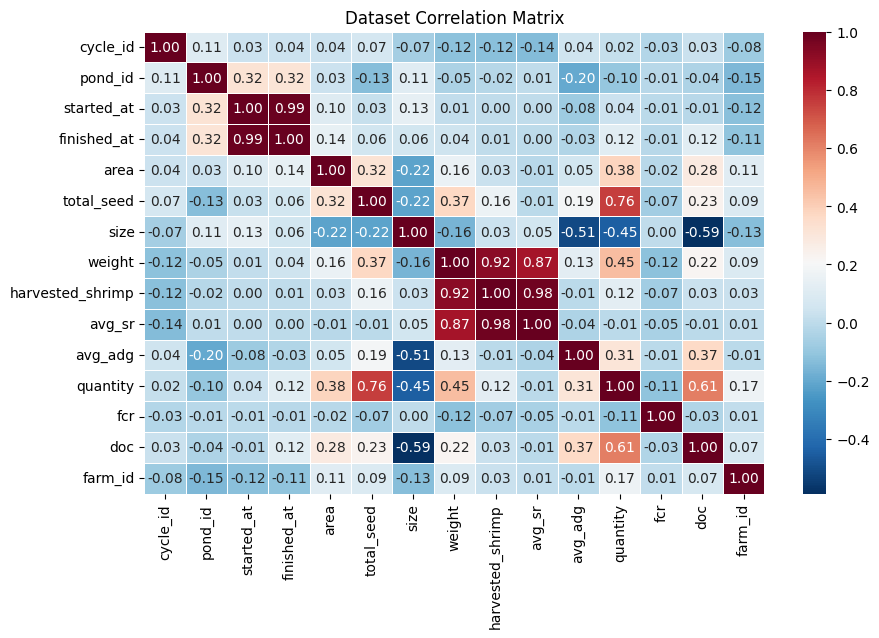

In [20]:
# Menghitung matriks korelasi
correlation_matrix = data_final.corr()

fig, ax = plt.subplots(figsize=[10,6])

sns.heatmap(correlation_matrix, annot= True, linewidths= .5, fmt= '.2f', ax= ax, cmap= 'RdBu_r')
ax.set_title('Dataset Correlation Matrix')
plt.show()

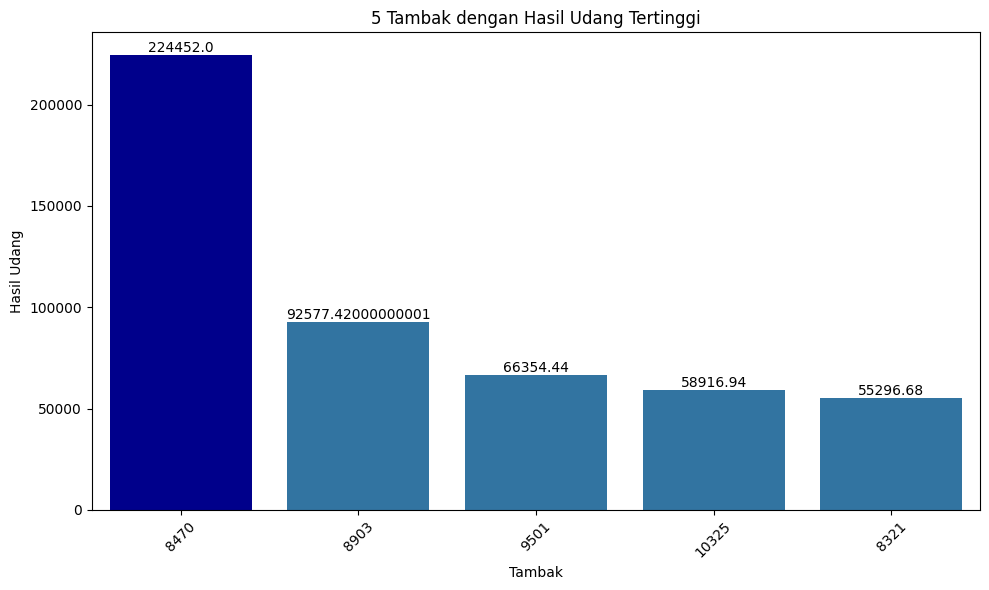

In [21]:
# Menghitung 5 kota dengan hasil udang tertinggi dan mengurutkan dari terbesar ke terkecil
top_5_cyclus = data_final.groupby('farm_id')['weight'].sum().reset_index().sort_values(by='weight', ascending=False).head(5)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='farm_id', y='weight', data=top_5_cyclus, order=top_5_cyclus.sort_values('weight', ascending=False)['farm_id'])
for index, value in enumerate(top_5_cyclus['weight'].sort_values(ascending=False)):
    plt.text(index, value, str(value), ha='center', va='bottom')  # Adjust the vertical offset for better visualization
    
max_value = top_5_cyclus['weight'].max()
for patch in bar_plot.patches:
    if patch.get_height() == max_value:
        patch.set_facecolor('darkblue')

plt.title('5 Tambak dengan Hasil Udang Tertinggi')
plt.xlabel('Tambak')
plt.ylabel('Hasil Udang')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
# Kelompokkan data berdasarkan tambak
tambak_grouped = data_final.groupby('farm_id')

# Inisialisasi dictionary untuk menyimpan rata-rata SR, FCR, ADG, dan lama per tambak
average_data_per_tambak = {'Tambak': [], 'Rata-rata SR': [], 'Rata-rata FCR': [], 'Rata-rata ADG': [], 'Rata-rata Lama Budidaya': []}

# Loop melalui setiap kelompok tambak
for tambak, group in tambak_grouped:
    # Hitung rata-rata SR, FCR, ADG, dan lama pada setiap tambak
    avg_sr = group['avg_sr'].mean()
    avg_fcr = group['fcr'].mean()
    avg_adg = group['avg_adg'].mean()
    avg_lama = group['doc'].mean()

    # Masukkan hasil ke dalam dictionary
    average_data_per_tambak['Tambak'].append(tambak)
    average_data_per_tambak['Rata-rata SR'].append(avg_sr)
    average_data_per_tambak['Rata-rata FCR'].append(avg_fcr)
    average_data_per_tambak['Rata-rata ADG'].append(avg_adg)
    average_data_per_tambak['Rata-rata Lama Budidaya'].append(avg_lama)

# Buat DataFrame dari dictionary
average_df = pd.DataFrame(average_data_per_tambak)

# Cetak DataFrame rata-rata per tambak
average_filter = average_df.loc[average_df['Tambak'].isin([8470, 8903, 9501, 10325, 8321])]

average_filter

,Tambak,Rata-rata SR,Rata-rata FCR,Rata-rata ADG,Rata-rata Lama Budidaya
69,8321,101.618965,5.179375,0.132159,104.500000
96,8470,45.756078,2.671429,0.209244,115.265306
111,8903,2721.846799,3.030000,0.090483,68.750000
125,9501,106.341291,1.277500,0.331074,100.000000
148,10325,102.302244,1.416429,0.223860,92.642857


In [23]:
data_filter = data_final[data_final['farm_id'] == 8470]
data_filter

,cycle_id,pond_id,started_at,finished_at,area,total_seed,size,weight,harvested_shrimp,avg_sr,avg_adg,quantity,fcr,doc,farm_id
0,7615,34700,2023-01-13,2023-06-06,4999.90,200000.0,30.80,5472.0,168537.60,84.268800,0.239361,10520.0,1.92,144,8470
2,9090,34728,2022-08-01,2022-11-24,4999.90,300000.0,19.90,5639.0,112216.10,37.405367,0.170876,7669.0,1.36,115,8470
38,14094,34691,2022-12-16,2023-03-18,4999.90,300000.0,18.00,5026.0,90468.00,30.156000,0.242208,6487.5,1.29,92,8470
43,14437,34707,2022-09-21,2023-01-18,4999.90,250000.0,20.40,3759.0,76683.60,30.673440,0.202333,7825.0,2.08,119,8470
59,15065,34687,2022-11-30,2023-03-16,5005.54,300000.0,24.40,6156.0,150206.40,50.068800,0.236667,8423.5,1.37,106,8470
68,15288,34695,2022-11-25,2023-03-19,4999.90,300000.0,24.20,5467.0,132301.40,44.100467,0.201635,8372.0,1.53,114,8470
81,15487,34696,2022-08-04,2022-11-22,4999.90,250000.0,28.40,5709.0,162135.60,64.854240,0.222755,8183.5,1.43,110,8470
89,15505,34724,2022-07-27,2022-12-10,4999.90,300000.0,21.20,3454.0,73224.80,24.408267,0.138769,10189.5,2.95,136,8470
107,15819,34694,2023-01-03,2023-04-25,4999.90,300000.0,23.20,5319.0,123400.80,41.133600,0.192857,7131.0,1.34,112,8470
110,15836,34697,2023-02-18,2023-06-20,4999.90,223000.0,22.20,3740.0,83028.00,37.232287,0.180625,7105.0,1.90,122,8470


In [24]:
data_filter.describe().T

,count,mean,min,25%,50%,75%,max,std
cycle_id,49.0,17765.081633,7615.0,16136.0,18237.0,19316.0,22601.0,2844.359827
pond_id,49.0,34712.673469,34687.0,34698.0,34716.0,34726.0,34733.0,14.669111
started_at,49,2022-11-02 20:34:17.142857216,2022-07-25 00:00:00,2022-09-20 00:00:00,2022-11-08 00:00:00,2023-01-04 00:00:00,2023-02-18 00:00:00,NaN
finished_at,49,2023-02-26 02:56:19.591836672,2022-11-21 00:00:00,2022-12-30 00:00:00,2023-02-14 00:00:00,2023-04-26 00:00:00,2023-06-22 00:00:00,NaN
area,49.0,4858.821837,385.0,4999.9,4999.9,4999.9,5142.32,749.701986
total_seed,49.0,264551.020408,80000.0,250000.0,300000.0,300000.0,350000.0,53337.393553
size,49.0,23.672653,10.7,20.4,22.4,28.2,37.4,6.049764
weight,49.0,4580.653061,90.7,3759.0,5026.0,5472.0,6225.0,1394.218098
harvested_shrimp,49.0,111457.323673,970.49,86955.0,114626.4,144377.8,183018.0,44288.905842
avg_sr,49.0,45.756078,0.388196,30.4768,40.497133,57.75112,108.69375,25.148107


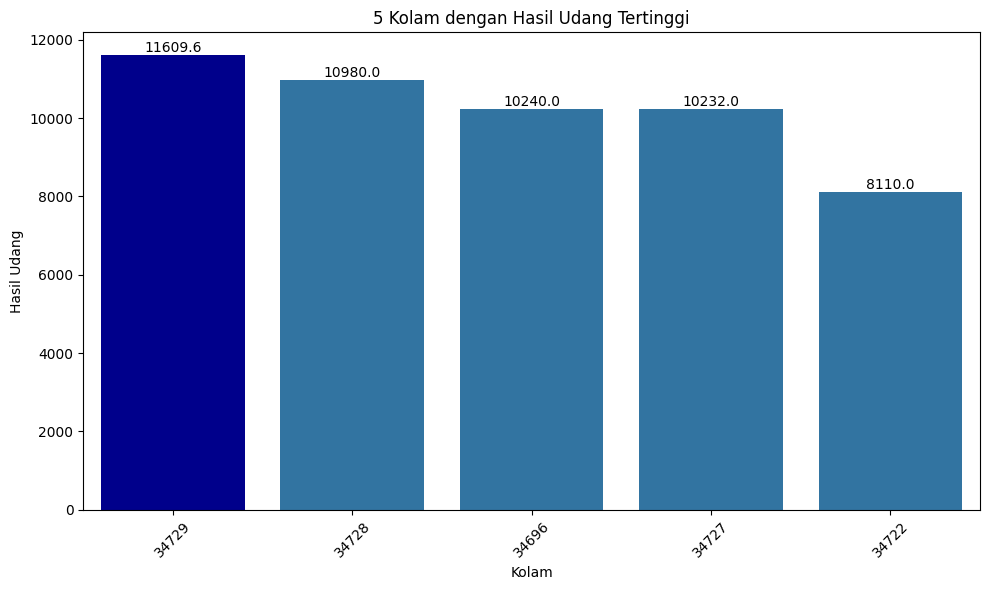

In [25]:
# Menghitung 5 kota dengan hasil udang tertinggi dan mengurutkan dari terbesar ke terkecil
top_5_pond = data_filter.groupby('pond_id')['weight'].sum().reset_index().sort_values(by='weight', ascending=False).head(5)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='pond_id', y='weight', data=top_5_pond, order=top_5_pond.sort_values('weight', ascending=False)['pond_id'])
for index, value in enumerate(top_5_pond['weight'].sort_values(ascending=False)):
    plt.text(index, value, str(value), ha='center', va='bottom')  # Adjust the vertical offset for better visualization
    
max_value = top_5_pond['weight'].max()
for patch in bar_plot.patches:
    if patch.get_height() == max_value:
        patch.set_facecolor('darkblue')

plt.title('5 Kolam dengan Hasil Udang Tertinggi')
plt.xlabel('Kolam')
plt.ylabel('Hasil Udang')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
data_filter2 = data_filter[data_filter['pond_id'] == 34729]
data_filter2

,cycle_id,pond_id,started_at,finished_at,area,total_seed,size,weight,harvested_shrimp,avg_sr,avg_adg,quantity,fcr,doc,farm_id
270,18538,34729,2022-08-02,2022-12-02,4999.9,300000.0,23.5,6220.0,146170.0,48.723333,0.174650,8758.5,1.41,122,8470
441,20975,34729,2023-01-17,2023-05-25,5079.4,200000.0,30.0,5389.6,161688.0,80.844000,0.218228,7660.0,1.42,128,8470


In [27]:
numerical_col = ['quantity', 'avg_sr', 'avg_adg', 'fcr', 'area', 'total_seed']

dict = {}
for col in numerical_col:
    percentile25 = data_final[col].quantile(0.25)
    percentile75 = data_final[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + (1.5 * IQR) 
    lower_limit = percentile25 - (1.5 * IQR)
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 

Apakah ada nilai NaN di data?
cycle_id            0
pond_id             0
started_at          0
finished_at         0
area                0
total_seed          0
size                0
weight              0
harvested_shrimp    0
avg_sr              0
avg_adg             0
quantity            0
fcr                 0
doc                 0
farm_id             0
dtype: int64

Apakah ada nilai tak hingga di data?
cycle_id            0
pond_id             0
started_at          0
finished_at         0
area                0
total_seed          0
size                0
weight              0
harvested_shrimp    0
avg_sr              0
avg_adg             0
quantity            0
fcr                 1
doc                 0
farm_id             0
dtype: int64
Data setelah pembersihan:
cycle_id            0
pond_id             0
started_at          0
finished_at         0
area                0
total_seed          0
size                0
weight              0
harvested_shrimp    0
avg_sr              0


Summary for feature 'avg_sr':

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     1484.
Date:                Tue, 14 May 2024   Prob (F-statistic):          1.60e-149
Time:                        23:54:31   Log-Likelihood:                -4462.1
No. Observations:                 486   AIC:                             8928.
Df Residuals:                     484   BIC:                             8937.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1893.6247

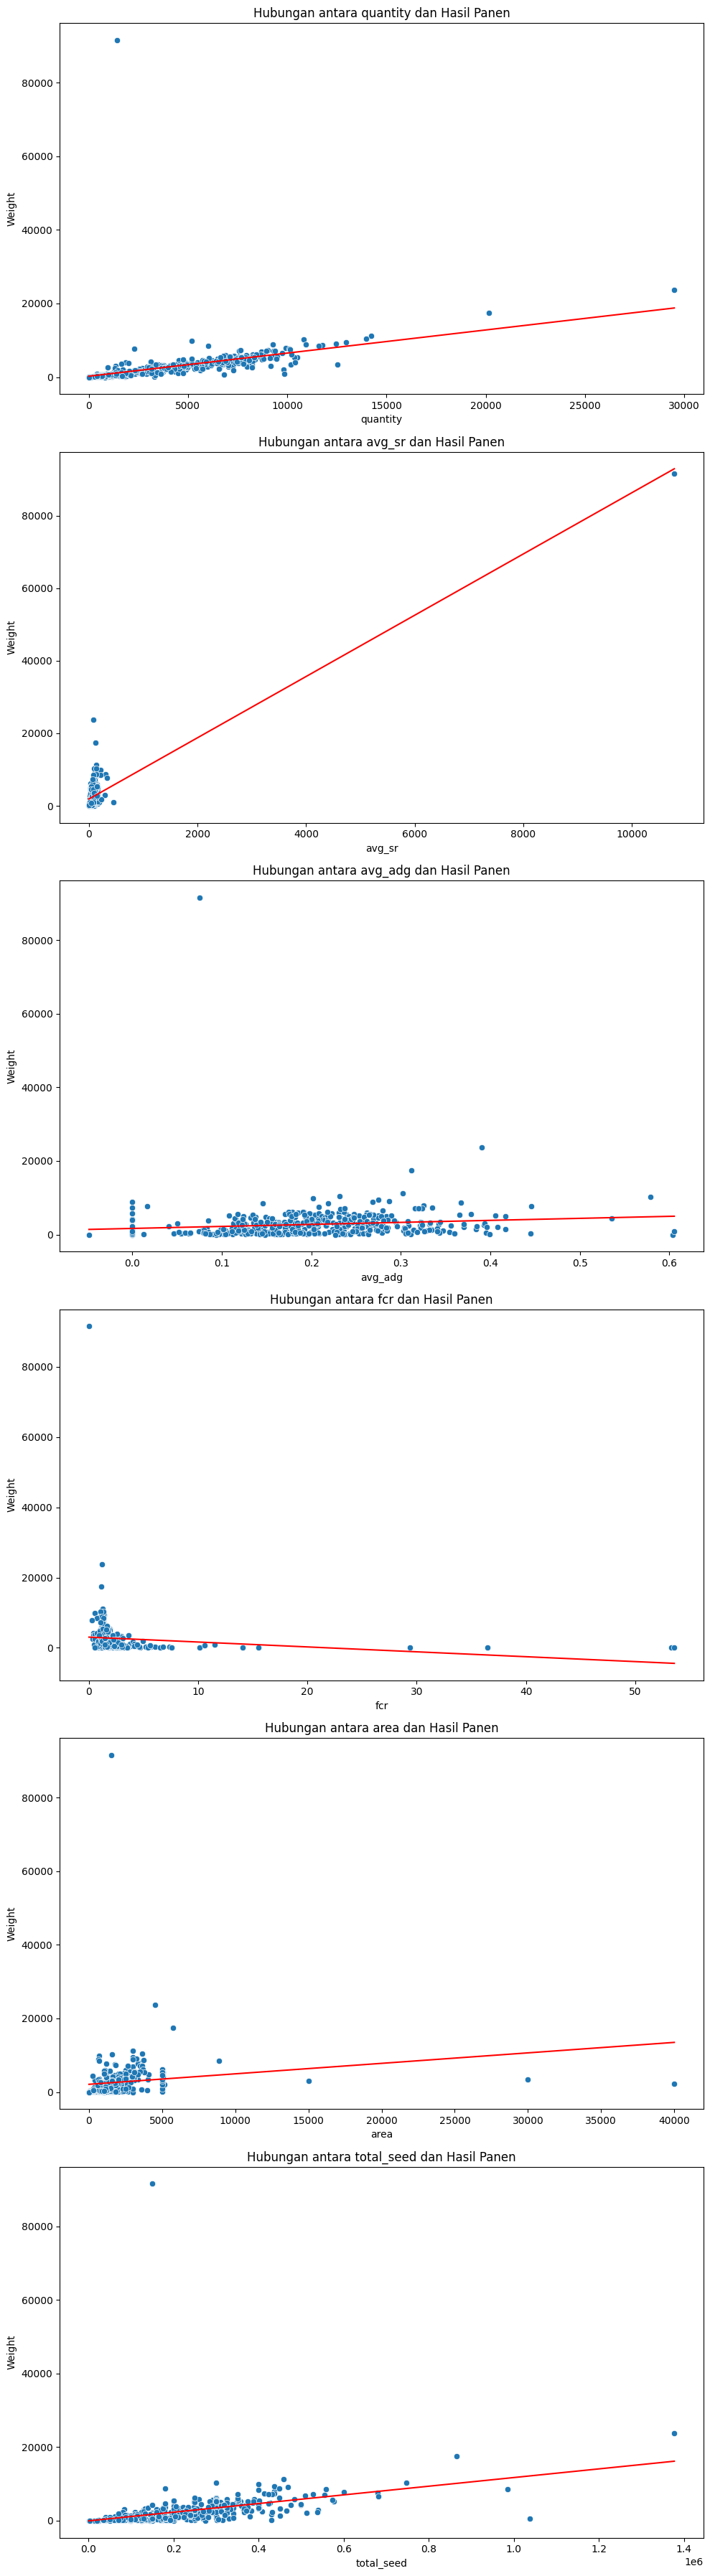

In [28]:
# Memeriksa apakah ada nilai NaN atau tak hingga
print("Apakah ada nilai NaN di data?")
print(data_final.isna().sum())

print("\nApakah ada nilai tak hingga di data?")
print(np.isinf(data_final).sum())

# Menghapus baris yang mengandung nilai NaN atau tak hingga
data_final = data_final.replace([np.inf, -np.inf], np.nan)
data_final = data_final.dropna()

# Memeriksa kembali data setelah pembersihan
print("Data setelah pembersihan:")
print(data_final.isna().sum())
print(np.isinf(data_final).sum())

# Definisikan fitur dan target
features = ['quantity', 'avg_sr', 'avg_adg', 'fcr', 'area', 'total_seed']
target = 'weight'

# Inisialisasi plot
fig, axes = plt.subplots(len(features), 1, figsize=(10, 6 * len(features)))

# Iterasi melalui setiap fitur dan bangun model regresi linear
for i, feature in enumerate(features):
    X = data_final[[feature]]
    y = data_final[target]
    
    # Menambahkan konstanta untuk model regresi
    X = sm.add_constant(X)
    
    # Membangun model regresi linear
    model = sm.OLS(y, X).fit()
    
    # Menampilkan ringkasan hasil regresi
    print(f"Summary for feature '{feature}':\n")
    print(model.summary())
    
    # Visualisasi scatter plot
    sns.scatterplot(x=feature, y=target, data=data_final, ax=axes[i])
    sns.lineplot(x=data_final[feature], y=model.predict(X), color='red', ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Weight')
    axes[i].set_title(f'Hubungan antara {feature} dan Hasil Panen')

plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                avg_adg   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     50.28
Date:                Wed, 15 May 2024   Prob (F-statistic):           4.74e-12
Time:                        00:04:44   Log-Likelihood:                 419.87
No. Observations:                 486   AIC:                            -835.7
Df Residuals:                     484   BIC:                            -827.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1505      0.007     21.190      0.0

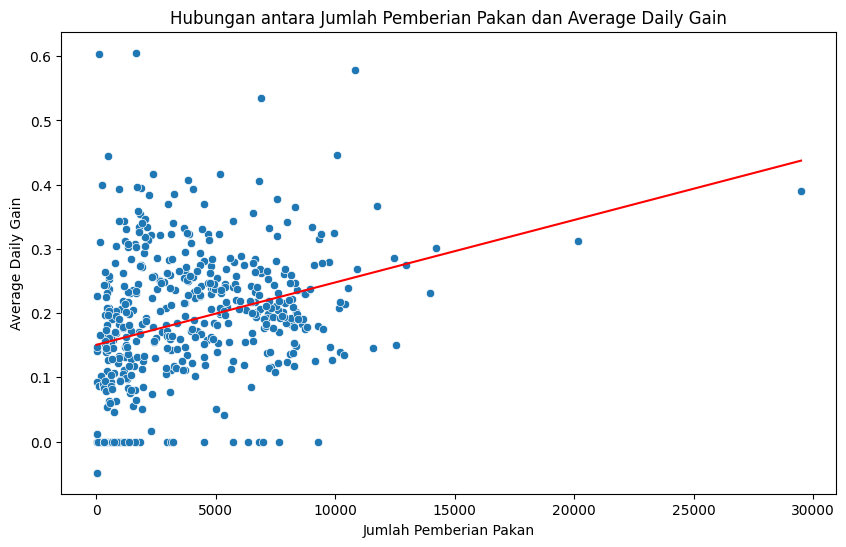

In [29]:
# Memilih fitur yang akan dianalisis
features = ['quantity']
target = 'avg_adg'

# Memisahkan fitur dan target
X = data_final[features]
y = data_final[target]

# Menambahkan konstanta untuk model regresi
X = sm.add_constant(X)

# Membangun model regresi linear
model = sm.OLS(y, X).fit()

# Melihat ringkasan hasil regresi
print(model.summary())

# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quantity', y='avg_adg', data=data_final)
sns.lineplot(x=data_final['quantity'], y=model.predict(X), color='red')
plt.xlabel('Jumlah Pemberian Pakan')
plt.ylabel('Average Daily Gain')
plt.title('Hubungan antara Jumlah Pemberian Pakan dan Average Daily Gain')
plt.show()